In [1]:
import json
import numpy as np
def load_data(dataset_path):
    with open(dataset_path, "r") as f:
        data = json.load(f)
    
    # Convert lists into numpy
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

In [2]:
dataset_path = "../input/data-json/data_10.json"
X, y = load_data(dataset_path)

In [5]:
X.shape, y.shape

((9986, 130, 13), (9986,))

In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Build ANN
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(216, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               865792    
_________________________________________________________________
dense_13 (Dense)             (None, 216)               110808    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                13888     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 991,138
Trainable params: 991,138
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 6.7609 - accuracy: 0.2893 - val_loss: 2.4122 - val_accuracy: 0.2978
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 2.1091 - accuracy: 0.2858 - val_loss: 2.0763 - val_accuracy: 0.3298
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1.8831 - accuracy: 0.3552 - val_loss: 2.1477 - val_accuracy: 0.2818
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1.7224 - accuracy: 0.4057 - val_loss: 1.9988 - val_accuracy: 0.3639
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1.6202 - accuracy: 0.4412 - val_loss: 1.9087 - val_accuracy: 0.3889
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1.5402 - accuracy: 0.4666 - val_loss: 1.9149 - val_accuracy: 0.3964
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1.4527 - accuracy: 0.4961 - val_loss: 1.8449 - val_accuracy: 0.4204
Epoch 

In [ ]:
# Overfitting

In [27]:
# Solve the overfitting

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(216, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax") 
])
model2.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [28]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 12.1625 - accuracy: 0.1376 - val_loss: 3.4354 - val_accuracy: 0.1116
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 3.8686 - accuracy: 0.1345 - val_loss: 3.4180 - val_accuracy: 0.1251
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 3.5705 - accuracy: 0.1456 - val_loss: 3.3629 - val_accuracy: 0.1421
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 3.4938 - accuracy: 0.1532 - val_loss: 3.3764 - val_accuracy: 0.1316
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 3.4203 - accuracy: 0.1540 - val_loss: 3.3255 - val_accuracy: 0.1512
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 3.3805 - accuracy: 0.1660 - val_loss: 3.2898 - val_accuracy: 0.1682
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 3.3397 - accuracy: 0.1721 - val_loss: 3.2996 - val_accuracy: 0.152

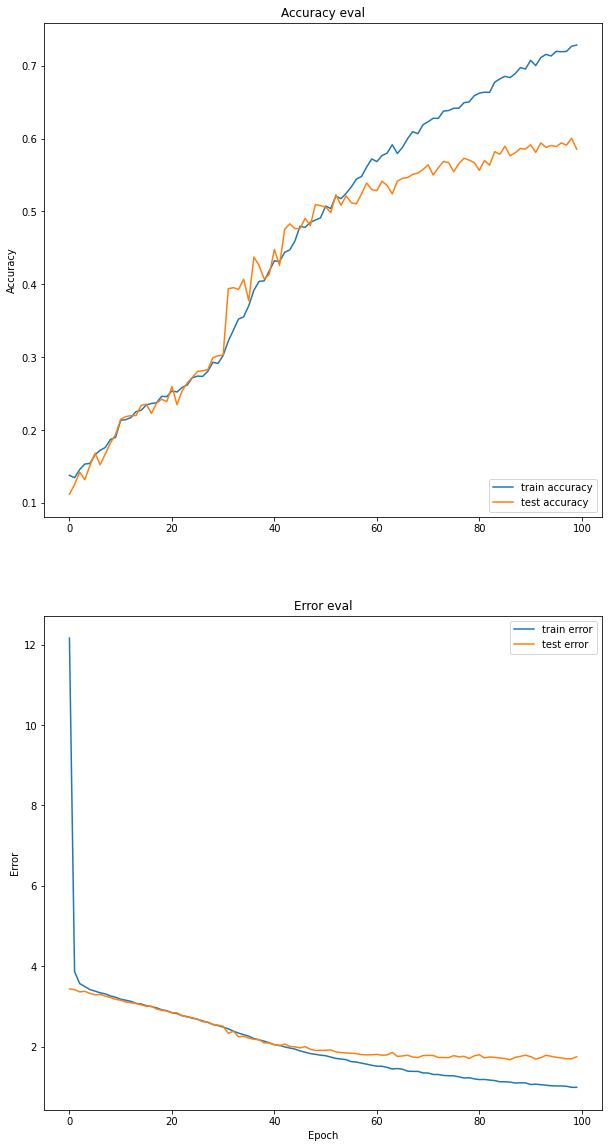

In [29]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(10, 20))

# create accuracy sublpot

axs[0].plot(history2.history["accuracy"], label="train accuracy")
axs[0].plot(history2.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# create error sublpot
axs[1].plot(history2.history["loss"], label="train error")
axs[1].plot(history2.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()